## Week 7 Assignment
**Objective For this Assignment:**
- To load and analyze a dataset using the pandas library in Python.
- To create simple plots and charts with the matplotlib library for visualizing the data.

In [45]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Task 1: Load and Explore the Dataset

In [46]:
try:
    # Attempt to read the Iris dataset
    data = pd.read_csv("iris.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    # Handle the case where the file is not found
    print("Error: The file 'iris.csv' was not found. Please check the file path.")
else:
    # If no error occurs, display the first few rows of the dataset
    print("\nShape of the dataset:")
    print(data.shape)

Dataset loaded successfully!

Shape of the dataset:
(150, 5)


In [47]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(data.head())

# Check dataset structure and missing values
print("\nDataset info:")
print(data.info())

# Check and handle missing values if any
print("\nCheck for missing values:")
if data.isnull().values.any():
    data.fillna(data.mean(), inplace=True)
    print("\nMissing values handled.")
else:
    print("\nNo missing values found.")


First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Check for missing values:

No missing values found.


#### Task 2: Basic Data Analysis

In [48]:
# Basic Statistics
print("\nBasic statistics of the numerical columns:")
print(data.describe())

print("\nNumber of observations recorded for each species:")
print(data["species"].value_counts())

# Group by species and calculate mean
group_means = data.groupby('species').mean()
print("\nMean values grouped by species:")
print(group_means)



Basic statistics of the numerical columns:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Number of observations recorded for each species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Mean values grouped by species:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260 

In [49]:
# Group by species and compute the mean for both petal length and petal width
petal_stats = data.groupby('species')[['petal_length', 'petal_width']].mean()

# Identify the species with the smallest petal length
smallest_petal_length_species = petal_stats['petal_length'].idxmin()
smallest_petal_length = petal_stats['petal_length'].min()

# Identify the species with the smallest petal width
smallest_petal_width_species = petal_stats['petal_width'].idxmin()
smallest_petal_width = petal_stats['petal_width'].min()

print(f"Species with the smallest average petal length: {smallest_petal_length_species} with an average petal length of {smallest_petal_length:.2f} cm")
print(f"Species with the smallest average petal width: {smallest_petal_width_species} with an average petal width of {smallest_petal_width:.2f} cm")

Species with the smallest average petal length: setosa with an average petal length of 1.46 cm
Species with the smallest average petal width: setosa with an average petal width of 0.24 cm


###### **Observations:**
- Setosa has the smallest petal of the Iris flowering plant

#### Task 3: Data Visualization

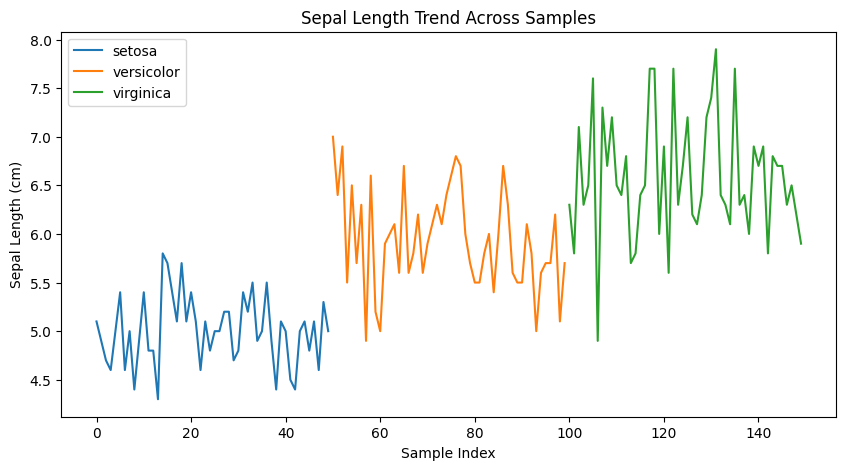

In [50]:
# Line chart for sepal length across species
plt.figure(figsize=(10, 5))
for species in iris.target_names:
    subset = data[data['species'] == species]
    plt.plot(subset.index, subset['sepal_length'], label=species)
plt.title('Sepal Length Trend Across Samples')
plt.xlabel('Sample Index')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.show()

###### **Observations:**
- Setosa has the smallest sepal length while Virginica has the largest of the Iris flowering plant.

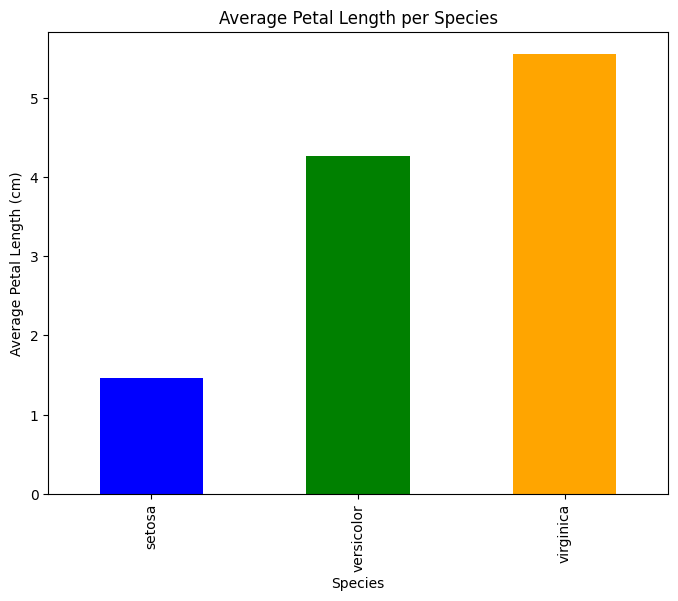

In [51]:
# Bar chart for average petal length per species
plt.figure(figsize=(8, 6))
group_means['petal_length'].plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('Average Petal Length per Species')
plt.ylabel('Average Petal Length (cm)')
plt.xlabel('Species')
plt.show()


###### **Observations:**
- Setosa has the smallest average petal length of the Iris flowering plant while Virginica has the largest.

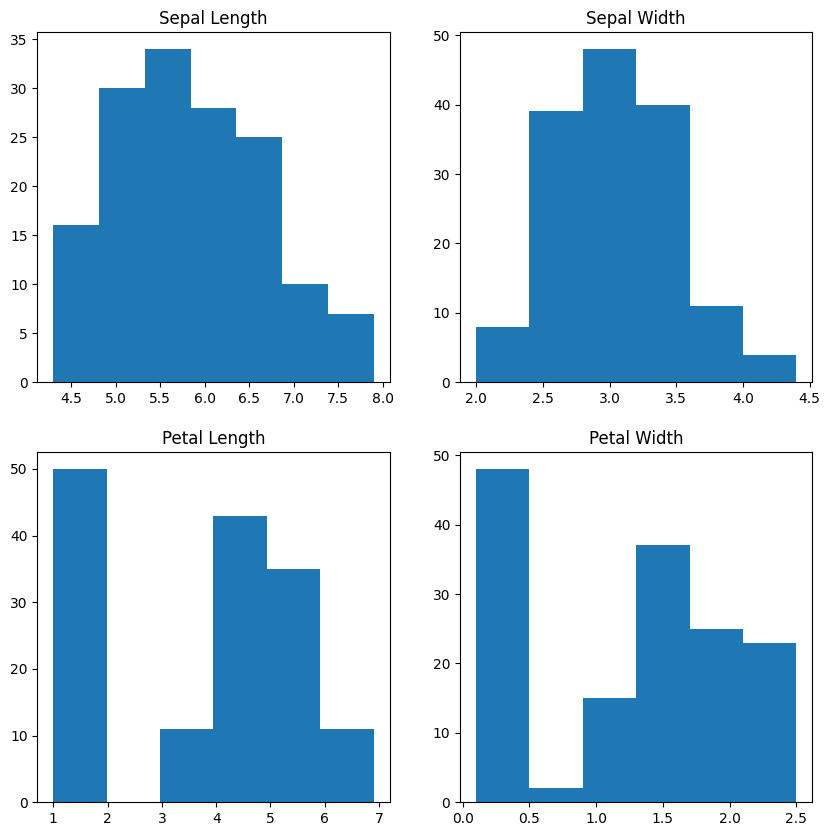

In [52]:
# Histograms for the distribution of data for the columns
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(data['sepal_length'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(data['sepal_width'], bins=6);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(data['petal_length'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(data['petal_width'], bins=6);

###### **Observations:**
- The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
- The highest frequency of the sepal width is between 40 and 50 which is between 3 and 3.5
- The highest frequency of the petal length is around 50 which is between 1 and 2
- The highest frequency of the petal width is between 40 and 50 which is between 0 and 0.5
0.5

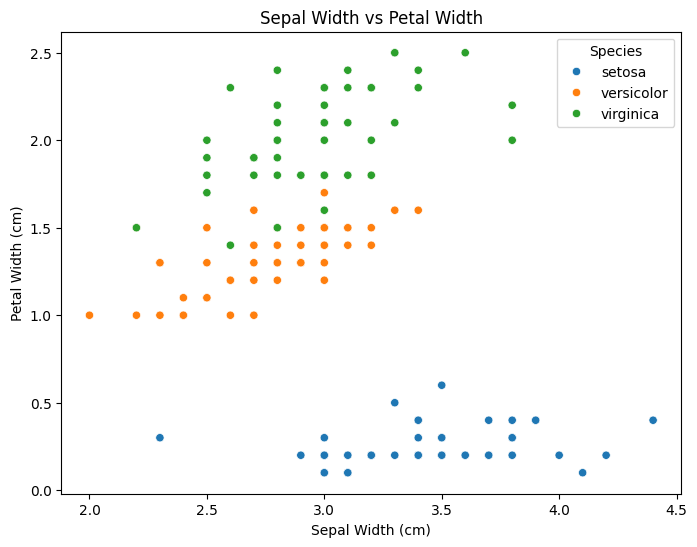

In [53]:
# Scatter plot for sepal width vs petal width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal_width', y='petal_width', hue='species')
plt.title('Sepal Width vs Petal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()